<a href="https://colab.research.google.com/github/Suman-bot8927/Portfolio/blob/main/Employee_Attrition_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip uninstall scikit-learn

In [ ]:
# !pip install scikit-learn==1.2.2

In [ ]:
# !pip install joblib==1.4.2

# Dataset Loading

In [ ]:
!gdown 13mZ7bcagoeehs8s71XYpefPKmkRLFmf0

Downloading...
From: https://drive.google.com/uc?id=13mZ7bcagoeehs8s71XYpefPKmkRLFmf0
To: /content/IBM.csv
100% 94.2k/94.2k [00:00<00:00, 29.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/IBM.csv')

In [ ]:
df.head(6)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7


# Data preporcessing

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(df[i].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Attrition']
for col in columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
columns = ['Department',"EducationField",'MaritalStatus']
df = pd.get_dummies(df, columns=columns, drop_first=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   JobSatisfaction                    1470 non-null   int64
 6   MonthlyIncome                      1470 non-null   int64
 7   NumCompaniesWorked                 1470 non-null   int64
 8   WorkLifeBalance                    1470 non-null   int64
 9   YearsAtCompany                     1470 non-null   int64
 10  Department_Human Resources         1470 non-null   bool 
 11  Department_Research & Development  1470 non-null   bool 
 12  Department_Sales    

In [ ]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,4,5993,8,1,6,...,True,False,True,False,False,False,False,False,False,True
1,49,0,8,1,3,2,5130,1,3,10,...,False,False,True,False,False,False,False,False,True,False
2,37,1,2,2,4,3,2090,6,3,0,...,False,False,False,False,False,True,False,False,False,True
3,33,0,3,4,4,3,2909,1,3,8,...,False,False,True,False,False,False,False,False,True,False
4,27,0,2,1,1,2,3468,9,3,2,...,False,False,False,False,True,False,False,False,True,False


# Train Test Split

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 21), (294, 21), (1176,), (294,))

# Trainning and Testing of different Machine Learing Models

Initilization of different ML models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
models = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators = 100, random_state = 2),
    'Support Vector Classifier': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors = 5),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators= 50),
}

Model Trainnig

In [ ]:
from sklearn.metrics import accuracy_score
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

[{'Model': 'Random Forest Classifier', 'Accuracy': 0.8707482993197279},
 {'Model': 'Support Vector Classifier', 'Accuracy': 0.8673469387755102},
 {'Model': 'Logistic Regression', 'Accuracy': 0.8707482993197279},
 {'Model': 'K-Nearest Neighbors', 'Accuracy': 0.8435374149659864},
 {'Model': 'Decision Tree Classifier', 'Accuracy': 0.7687074829931972},
 {'Model': 'AdaBoost Classifier', 'Accuracy': 0.8639455782312925}]

Model comparision

<ipython-input-25-bf2fcb7239c5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


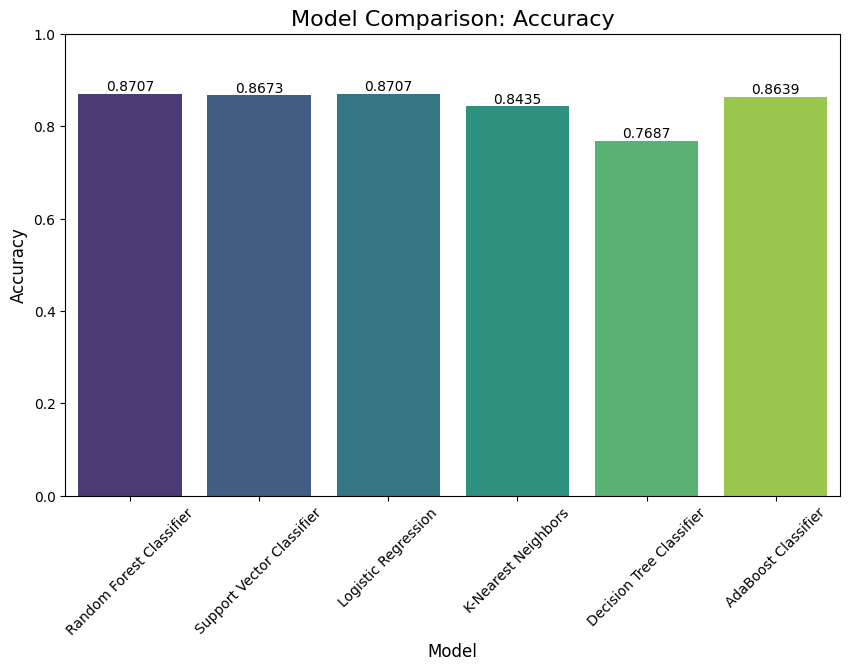

In [ ]:
results_df = pd.DataFrame(results)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison: Accuracy", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)  # Set y-axis range (0-1 for accuracy)
plt.xticks(rotation=45)

# Add annotations using ax.bar_label with actual values
# Iterate through containers and patches for annotation
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge')

plt.show()

# Best model Extraction (Random Forest)

In [ ]:
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state = 2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8707482993197279

In [ ]:
from sklearn.metrics import classification_report
print('Best Model Random Forest Classifier ')
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Model Random Forest Classifier 
0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.56      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.72      0.56      0.57       294
weighted avg       0.84      0.87      0.83       294



Accuracy: 0.8673


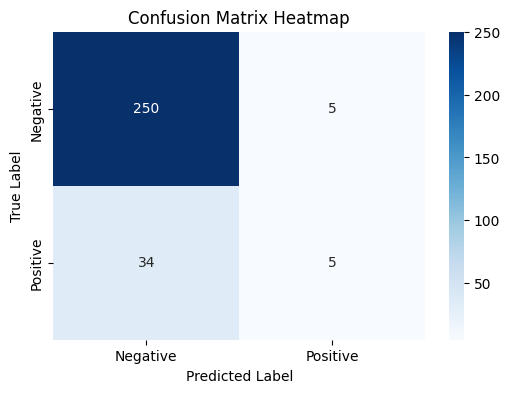

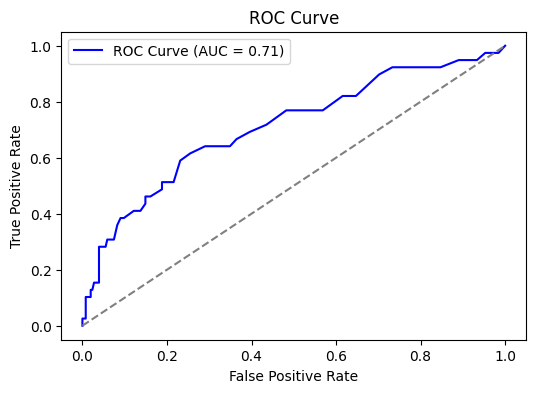

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Train the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot Confusion Matrix as Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
# import joblib
# joblib.dump(rf, 'Employee_Attrition_Prediction_RandomForest.joblib')

# Model Testing

In [ ]:
age = 30
department = 'Sales'
department_encoded = [0,0,1]
distance_from_home = 10
education = 2
education_field = 'Life Sciences'
education_field_encoded = [0,1,0,0,0,0]
environment_satisfaction = 3
job_satisfaction = 3
marital_status = 'Single'
marital_status_encoded = [0,0,1]
monthly_income = 5000
num_companies_worked = 2
work_life_balance = 2
total_working_years = 3

# Convert all features to 1D arrays before stacking
final_feature = np.hstack([
    np.array(age),
    np.array(department_encoded),
    np.array(distance_from_home),
    np.array(education),
    np.array(education_field_encoded),
    np.array(environment_satisfaction),
    np.array(job_satisfaction),
    np.array(marital_status_encoded),
    np.array(monthly_income),
    np.array(num_companies_worked),
    np.array(work_life_balance),
    np.array(total_working_years)
])

result = int(rf.predict([final_feature])[0])
if(result == 0):
  print('Employee will not leave the company')
else:
  print('Employee will leave the company')

Employee will leave the company


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
age = 40
department = 'Sales'
department_encoded = [0,0,1]
distance_from_home = 10
education = 2
education_field = 'Life Sciences'
education_field_encoded = [0,1,0,0,0,0]
environment_satisfaction = 3
job_satisfaction = 3
marital_status = 'Single'
marital_status_encoded = [0,0,1]
monthly_income = 50000
num_companies_worked = 2
work_life_balance = 2
total_working_years = 10

# Convert all features to 1D arrays before stacking
final_feature = np.hstack([
    np.array(age),
    np.array(department_encoded),
    np.array(distance_from_home),
    np.array(education),
    np.array(education_field_encoded),
    np.array(environment_satisfaction),
    np.array(job_satisfaction),
    np.array(marital_status_encoded),
    np.array(monthly_income),
    np.array(num_companies_worked),
    np.array(work_life_balance),
    np.array(total_working_years)
])

result = int(rf.predict([final_feature])[0])
if(result == 0):
  print('Employee will not leave the company')
else:
  print('Employee will leave the company')

Employee will not leave the company


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
